In [5]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------
import warnings
warnings.filterwarnings("ignore")

### RESUMEN DE LAS FASES ANTERIORES

En las fases anteriores, hemos realizado una exploración y transformación de los datos, creación de nuestra base de datos y A/B Testing



- Exploración y transformación de datos: duplicados, gestión de nulos, modificación de tipos de datos...
- Creación de base de datos: Usamos el lenguaje de Python para cargar nuestros datos en MySQL.
- A/B Testing: Comprobamos si había diferencias significativas entre los diferentes grupos de satisfacción y ver si hay relación entre la satisfacción laboral y rotación de los empleados.

### VISUALIZACIONES

ANALISIS GENERAL DE LA EMPRESA

- Distribución demográfica de los empleado
- Distribución por roles y niveles de educación.

ANALISIS DEL NIVEL DE SATISFACCION

- Distribución del nivel de satisfacción de los empleados.
- Alguna comparación entre departamentos y satisfacción.

ANALISIS DE ROTACION
- Tasa de rotación de los empleados.
- Comparación de tasas de rotación por departamentos.
- Relación entre la satisfacción laboral y la rotación.

In [6]:
df = pd.read_csv("Files/df_fase1.csv", index_col=0)
df.head()

,IdEmployee,EmployeeNumber,Age,DateBirth,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,RemoteWork
0,0,"162,0",52,1972,No,no-data,684.0,6,3,no-data,1,Male,51.0,3,5,Research Director,3,no-data,6462.0,7,No,13,3,3,0,no-data,5,3,20,15,15,True
1,1,"259,0",53,1971,No,no-data,699.0,1,4,Life Sciences,3,Male,65.0,2,5,Manager,3,no-data,5678.0,0,no-data,14,3,1,1,"34,0",5,3,33,11,9,True
2,2,"319,0",43,1981,No,travel_rarely,532.0,4,2,Technical Degree,3,Male,58.0,3,5,Manager,4,Married,4933.0,1,No,11,3,4,0,"22,0",3,3,22,11,15,True
3,3,"1900,0",49,1975,No,no-data,117.0,22,3,Medical,4,Female,58.0,3,4,Manager,4,no-data,2437.0,3,No,11,3,2,1,no-data,3,3,22,4,7,True
4,4,"81,0",60,1964,No,no-data,1435.0,25,3,Life Sciences,1,Female,99.0,3,3,Sales Executive,1,no-data,2354.0,7,no-data,11,3,4,0,"28,0",3,2,21,7,9,True


In [7]:
personal_info = ['Age','Gender','MaritalStatus','Education','EducationField']
employee_satisfacion = ['EnviromentSatisfaction','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance']
job_extras = ['OverTime', 'BusinessTravel', 'StockOptionLevel', 'TrainingTimesLastYear', 'RemoteWork', 'PerformanceRating']
salary = ["HourlyRate","DailyRate","MonthlyRate","PercentSalaryHike"]
job_data = ["Attrition","JobLevel","JobRole","NumCompaniesWorked","TotalWorkingYears","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager"]

Siguiendo el esquema realizado en la FASE 3 vamos a hacer el análisis por bloques primero de cada tabla creada y luego se hará un analisis más exhaustivo cruzando tablas y siguiendo la propuesta de análisis de la FASE 4.
En algunos casos de algunas columnas que tienen un no-data demasiado extenso no se ha incluido en el analisis

# Personal Info

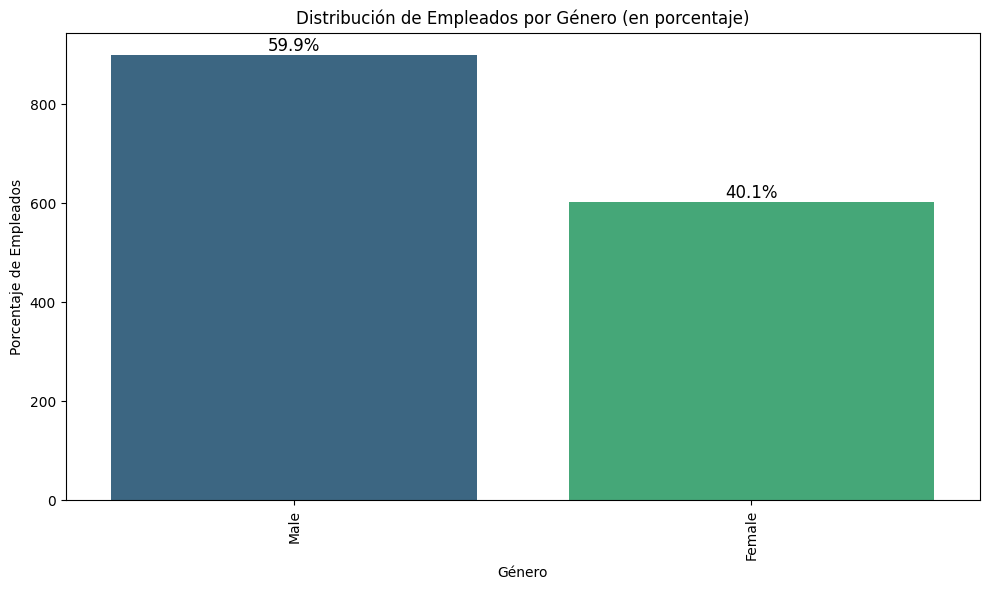

In [8]:

gender_counts = df['Gender'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Gender", data=df, palette="viridis")

plt.xticks(rotation=90)
plt.xlabel("Género")
plt.ylabel("Porcentaje de Empleados")
plt.title("Distribución de Empleados por Género (en porcentaje)")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df))
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 1, 
            percentage, ha="center", va="bottom", fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



Hay un 10% más de hombres que de mujeres. Al ser una empresa tan grande, dentro del estado español se le exigiría un plan de igualdad que, por ejemplo, en este caso, tendría que proponer mejoras dentro de la empleabilidad de empleadas. Además de esto se hace extraños pues la empresa pertenece al sector de la salud y la investigación, un sector que también suele estar bastante feminizado.

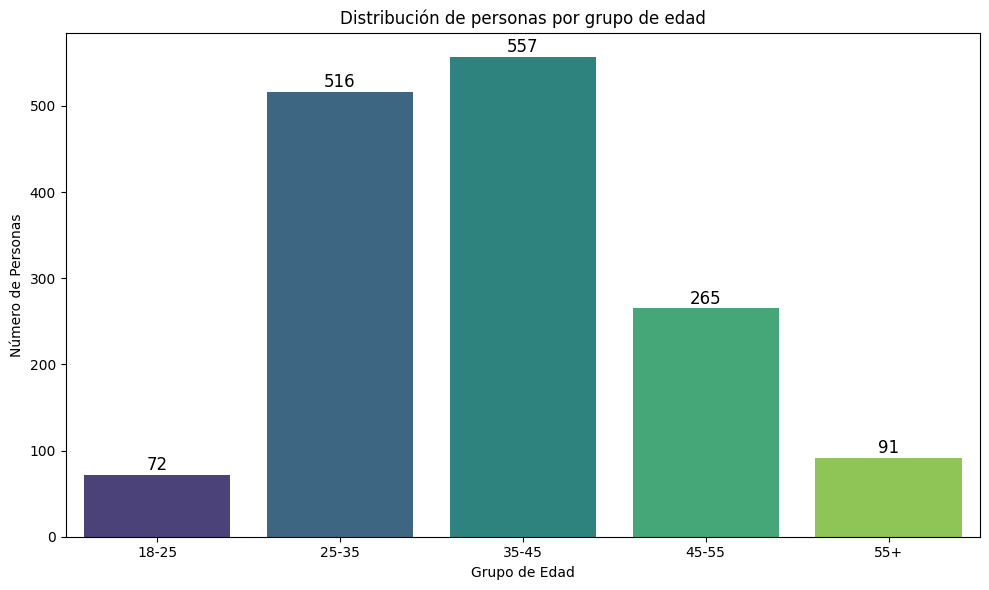

In [9]:
bins = [18, 25, 35, 45, 55, float('inf')]
labels = ['18-25', '25-35', '35-45', '45-55', '55+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_counts = df['Age Group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')

plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Personas')
plt.title('Distribución de personas por grupo de edad')

for i, count in enumerate(age_group_counts.values):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


Con respecto a la edad vemos que es una empresa que aproximadamente dos tercios de sus trabajadores/as están entre los 24 y 45 años. Se ve que los rangos de edad son bastante convencionales y que no hace una gran apuesta por la contratación de los colectivos que más dificultad tienen a la hora de encontrar trabajo,q ue son los más jovenes y los más mayores.

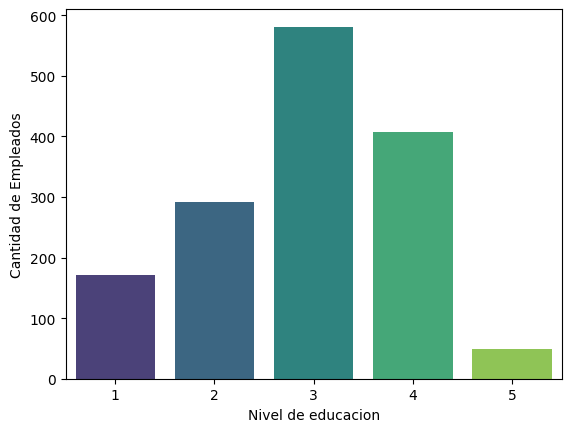

In [10]:

sns.countplot(x = "Education", 
              data = df,
              palette= "viridis")


plt.xlabel("Nivel de educacion")
plt.ylabel("Cantidad de Empleados");

Dentro de los niveles educativos se ve que la empresa requiere de gran personal técnico, situandose en el nivel 3 educativo la mayoría de sus trabajadores.

# JOB DATA

In [11]:
["Attrition","JobLevel","JobRole","NumCompaniesWorked","TotalWorkingYears","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager"]

['Attrition',
 'JobLevel',
 'JobRole',
 'NumCompaniesWorked',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

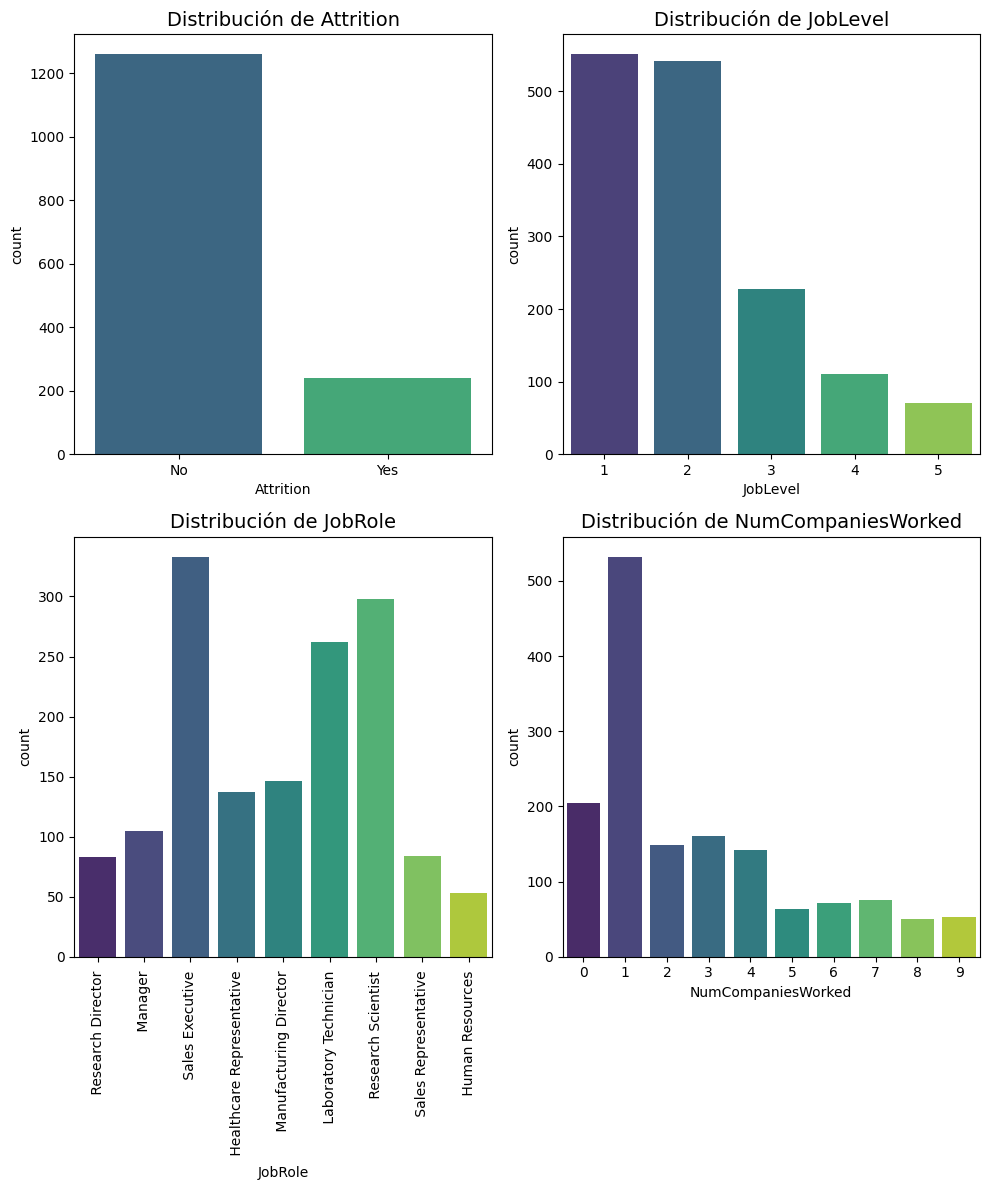

In [12]:
columns = ["Attrition", "JobLevel", "JobRole", "NumCompaniesWorked"]
fig, axes = plt.subplots(2, 2, figsize=(10, 12)) 


plt.tight_layout(pad=5.0)


for i, col in enumerate(columns):
    
    ax = axes[i // 2, i % 2]
    
    
    sns.countplot(x=col, data=df, palette='viridis', ax=ax)
    
    
    ax.set_title(f'Distribución de {col}', fontsize=14)
    
    if col == "JobRole":
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


- No hay gran rotación en la empresa
- El Job Level es bastante convencional siendo la mayor contratación dentro del nivel de JobLevel más bajo y luego va descendiendo hasta el último nivel por lo que podemos entender que es un nivel piramidel dentro de la jerarquia de la empresa
- Respecto al JobRole se ve cómo gran parte del trabajo se centra en las ventas donde hay mucho más personal que en el resto de niveles.

Se nos planté cómo es la distribución del JobRole de la empresa por género y lo representamos en un gráfico de barras. En él se colocan ambos géneros en porcentaje para poder comprar poblaciones y nos encontrarmos que, al contrario de lo común, los puestos que comúnmente estan masculinizados debido al techo de cristal como "Manager" o puestos directivos hay más mujeres que hombres y que, por lo contrario, en los técnicos de laboratorio hay más hombres que mujeres, cosa que suele ser al reves

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ' Healthcare Representative '),
  Text(1, 0, ' Human Resources '),
  Text(2, 0, ' Laboratory Technician '),
  Text(3, 0, ' Manager '),
  Text(4, 0, ' Manufacturing Director '),
  Text(5, 0, ' Research Director '),
  Text(6, 0, ' Research Scientist '),
  Text(7, 0, ' Sales Executive '),
  Text(8, 0, ' Sales Representative ')])

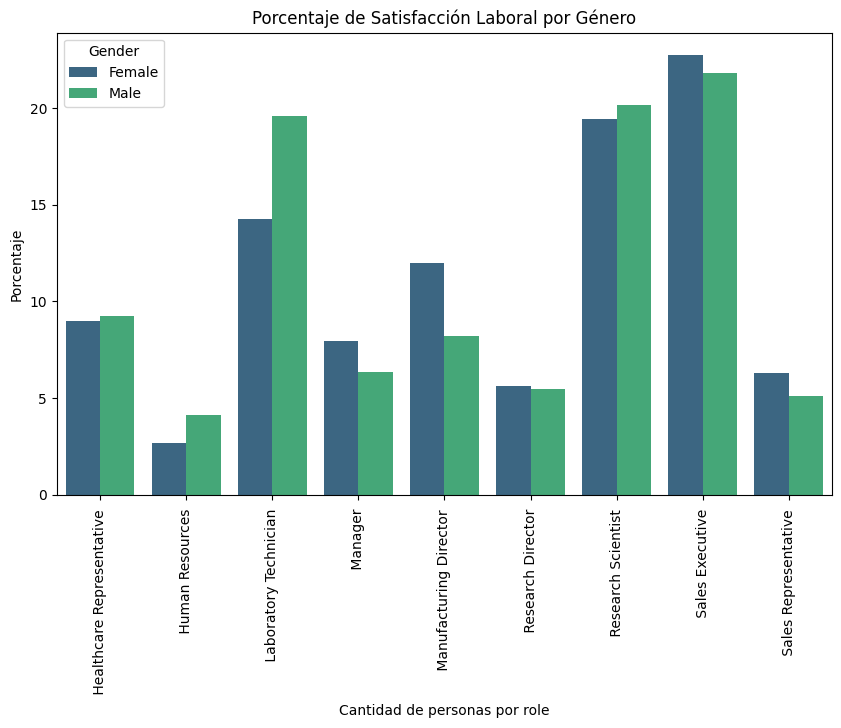

In [35]:
grouped = df.groupby(['Gender', 'JobRole']).size().reset_index(name='count')


total_by_gender = df['Gender'].value_counts().reset_index()
total_by_gender.columns = ['Gender', 'total']
grouped = grouped.merge(total_by_gender, on='Gender')
grouped['percentage'] = (grouped['count'] / grouped['total']) * 100


plt.figure(figsize=(10, 6))
sns.barplot(x='JobRole', y='percentage', hue='Gender', data=grouped,  palette = 'viridis')

# Etiquetas y título
plt.title('Porcentaje de Satisfacción Laboral por Género')
plt.ylabel('Porcentaje')
plt.xlabel('Cantidad de personas por role')
plt.xticks(rotation = 90) 

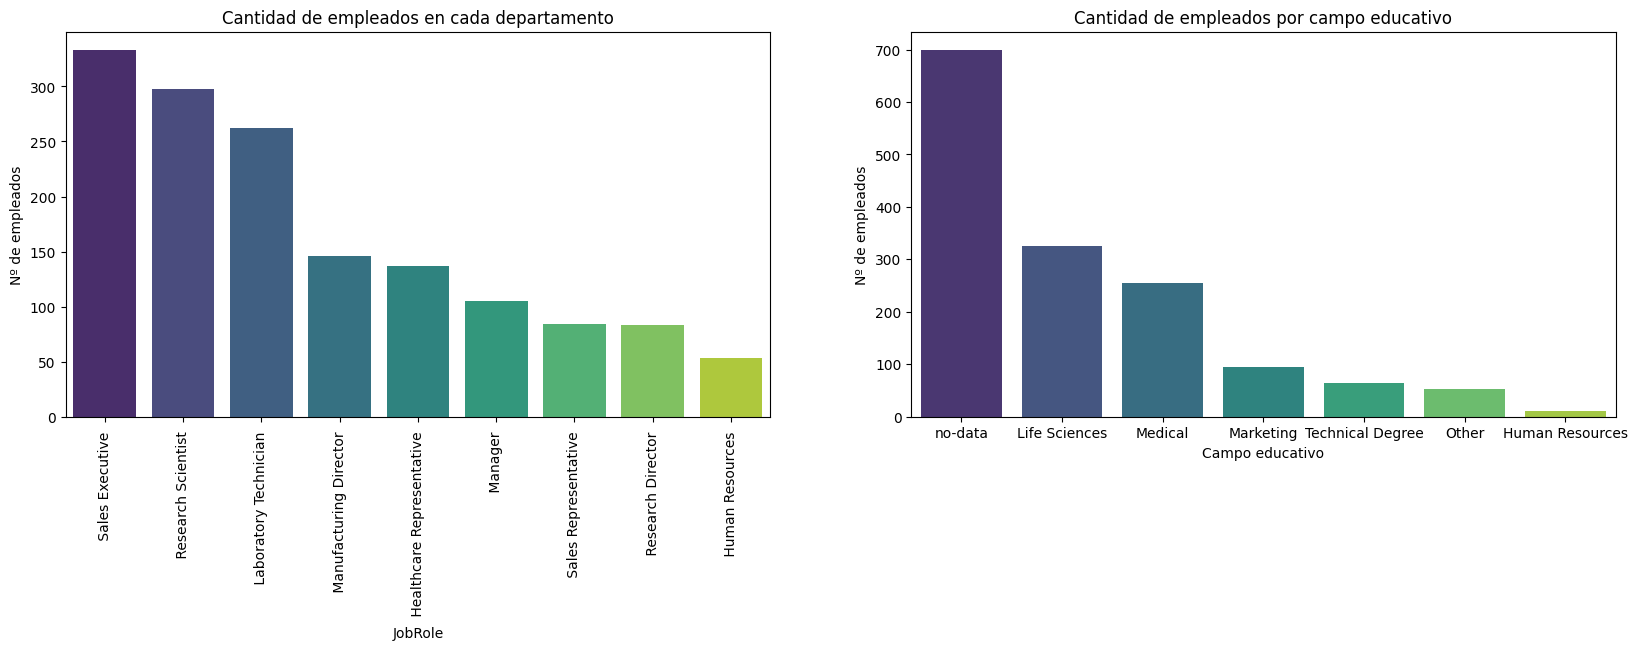

In [22]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

roles_count = df['JobRole'].value_counts()

sns.barplot(x = roles_count.index,
            y = roles_count.values,
            ax = axes[0], 
            palette = "viridis")

axes[0].set_xticklabels(roles_count.index, rotation=90)

education_count = df["EducationField"].value_counts()

sns.barplot(x = education_count.index, 
            y = education_count.values,
            ax = axes[1],
            palette = "viridis")


axes[0].set_title("Cantidad de empleados en cada departamento")

axes[0].set_xlabel("JobRole")

axes[0].set_ylabel("Nº de empleados")


axes[1].set_title("Cantidad de empleados por campo educativo")

axes[1].set_xlabel("Campo educativo")

axes[1].set_ylabel("Nº de empleados");

# EMPLOYEE SATISFACTION

Miramos primero los niveles de satisfaccion en general y yá luego más especificamente por perfiles

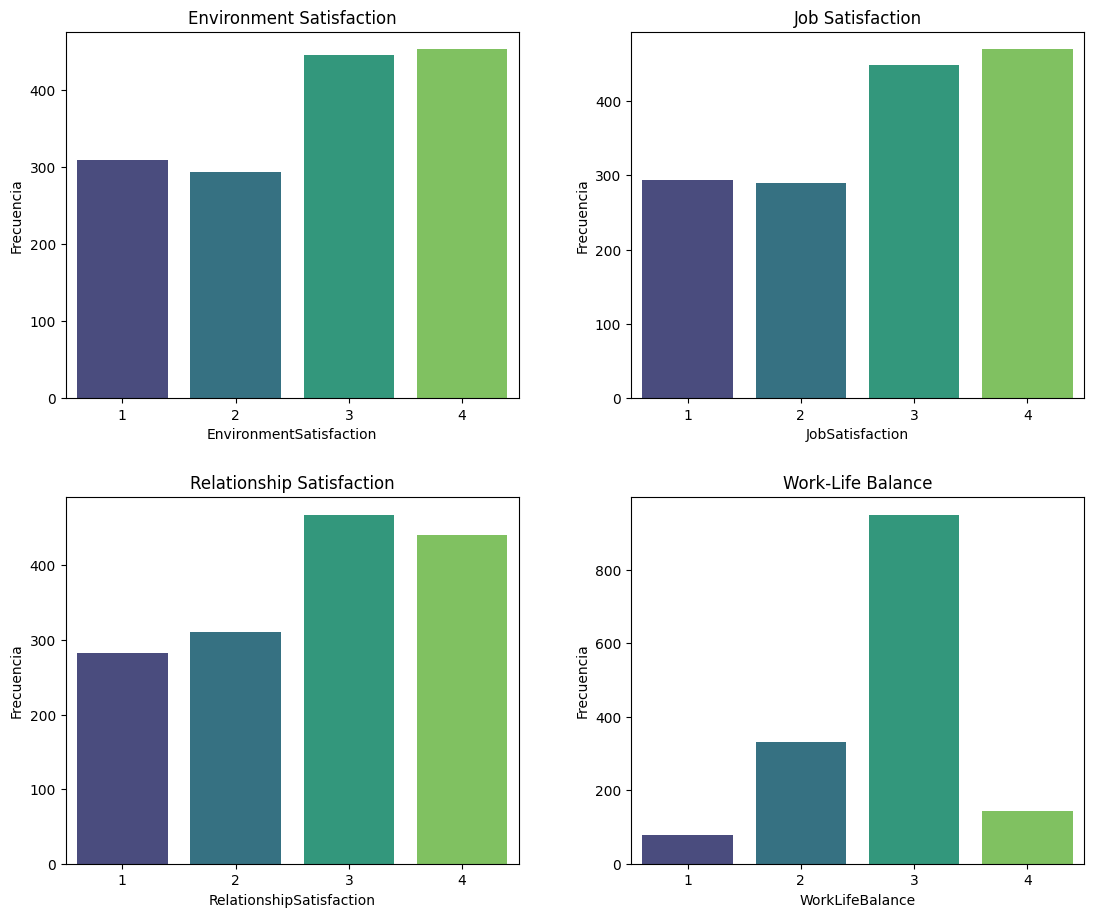

In [39]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plt.tight_layout(pad=5.0)

columns = ['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']

titles = ['Environment Satisfaction', 'Job Satisfaction', 'Relationship Satisfaction', 'Work-Life Balance']

for i, col in enumerate(columns):
    ax = axes[i // 2, i % 2]
    
    sns.countplot(x=col, data=df, palette='viridis', ax=ax)
    
    ax.set_title(titles[i])
   
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

plt.show()


Ahora vamos  a mirar la JobSatisfaction según otros perfiles:

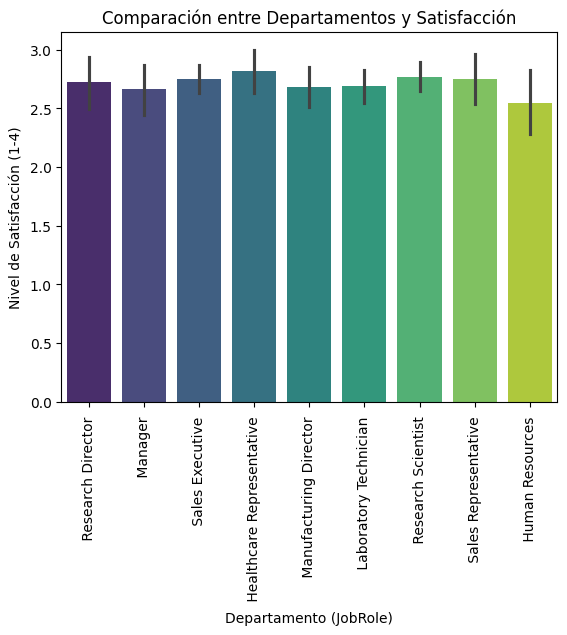

In [36]:
sns.barplot(x = "JobRole",
            y = "JobSatisfaction",
            data = df,
            palette = "viridis")

plt.title('Comparación entre Departamentos y Satisfacción')
plt.xlabel('Departamento (JobRole)')
plt.ylabel('Nivel de Satisfacción (1-4)')

plt.xticks(rotation=90);

Vemos que por JobRole las medias son bastante similares, donde ninguno llega al 3 por lo que vemos una tendencia a la insatisfacción por parte de todos los JobRole

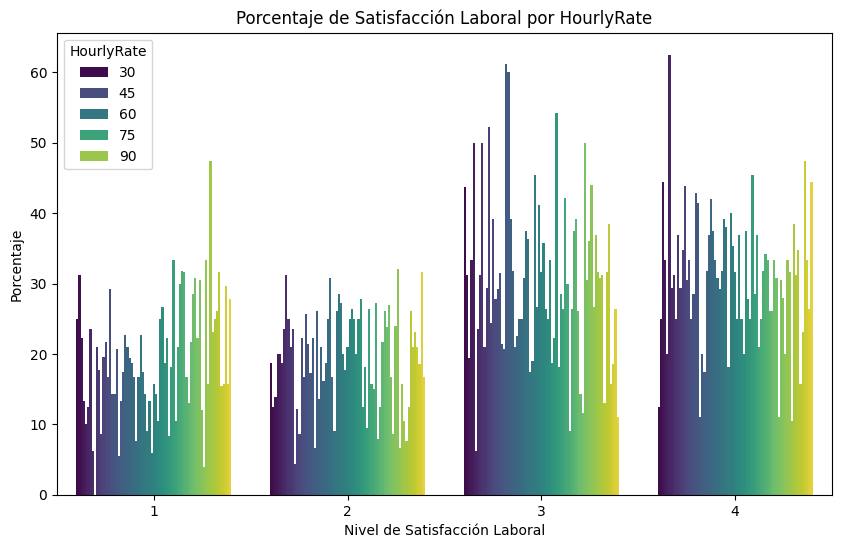

In [37]:
grouped = df.groupby(['HourlyRate', 'JobSatisfaction']).size().reset_index(name='count')

total_by_gender = df['HourlyRate'].value_counts().reset_index()
total_by_gender.columns = ['HourlyRate', 'total']
grouped = grouped.merge(total_by_gender, on='HourlyRate')
grouped['percentage'] = (grouped['count'] / grouped['total']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='JobSatisfaction', y='percentage', hue='HourlyRate', data=grouped, palette= 'viridis')

plt.title('Porcentaje de Satisfacción Laboral por HourlyRate')
plt.ylabel('Porcentaje')
plt.xlabel('Nivel de Satisfacción Laboral')

plt.show()

Contra todo percepción a priori, parece que las personas con más sueldo estan menos satisfechas y las que menos sueldo ganan la hora tienen más niveles de satisfacción

# ROTACION DE LA EMPRESA Y SATISFACCION

Siguiendo la premisa de la FASE 4 se ha comparado la rotación, es decir, ver la gente que se ha ido y que se ha quedado qué niveles de satisfacción tienen

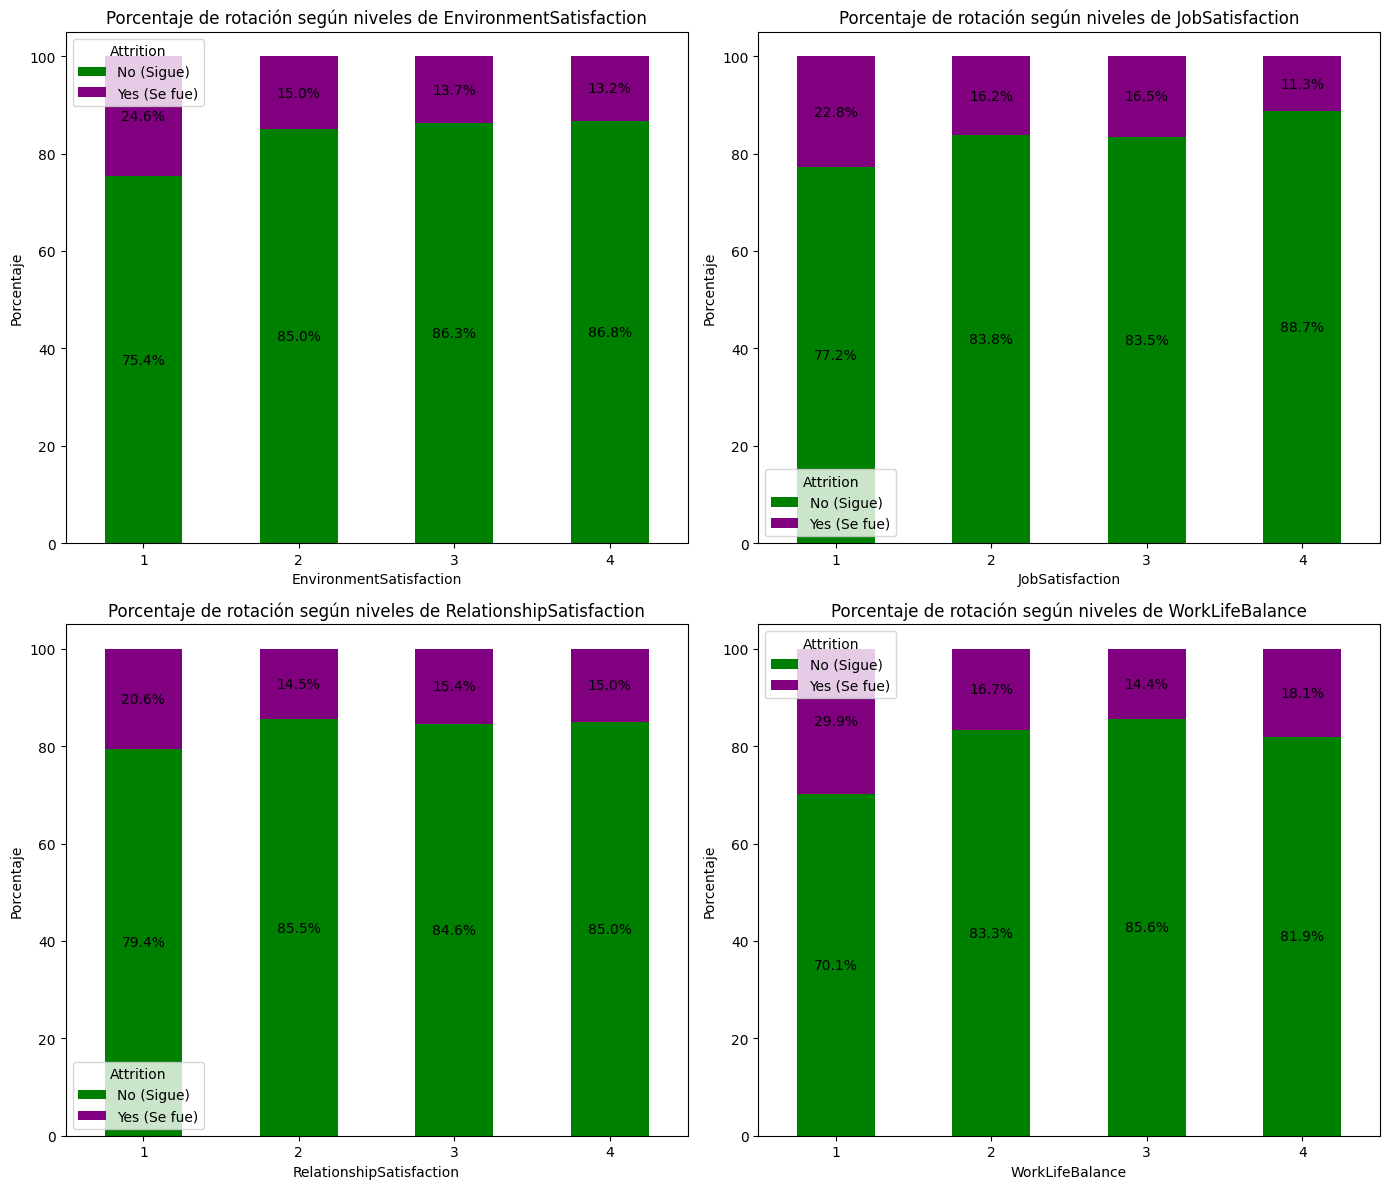

In [41]:
tipo_satisfactions = ['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

plt.tight_layout(pad=5.0)

for i, tipo_satisfaction in enumerate(tipo_satisfactions):

    conteo_grupos = df.groupby([tipo_satisfaction, 'Attrition']).size().unstack()

    porcentajes = conteo_grupos.apply(lambda x: x / x.sum() * 100, axis=1)

    ax = axes[i // 2, i % 2]

    ax = porcentajes.plot(kind='bar', stacked=True, color=['green', 'purple'], ax=ax)

    ax.set_title(f'Porcentaje de rotación según niveles de {tipo_satisfaction}')
    ax.set_ylabel('Porcentaje')
    ax.set_xlabel(tipo_satisfaction)
    ax.legend(title='Attrition', labels=['No (Sigue)', 'Yes (Se fue)'])
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2

        if height > 0:
            ax.annotate(f'{height:.1f}%', (x, y), ha='center', va='center')

plt.tight_layout()
plt.show()


CONCLUSIONES

- Podemos dar recomendaciones sobre como retener empleados como mejorar beneficios, bienestar laboral...

- Se ha visto que cuanta menos satisfacción hay entre los empleados, mayor es la tasa de rotación por lo que hay que mejorar el ambiente laboral